## 全体の流れ
<ol>
<li>株価データを読み込む</li>
<li>データの全体像をつかむ</li>
<li>特徴量を追加する</li>
<li>学習データと検証データに分割する</li>
<li>データを整える</li>
<li>予測モデルの作成と交差検証</li>
<li>検証データによる予測と精度検証</li>
</ol>

## 株価データを読み込み目的変数を追加する

In [8]:
import pandas as pd
#from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
import warnings
#import yfinance as yf
import datetime
#from dtw import dtw
from scipy.spatial.distance import euclidean
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter("ignore")
%matplotlib inline

In [9]:
start_dates=["2012-01-01","2012-02-01","2012-03-01","2012-04-01","2012-05-01","2012-06-01","2012-07-01","2012-08-01","2012-09-01","2012-10-01","2012-11-01","2012-12-01",
             "2013-01-01","2013-02-01","2013-03-01","2013-04-01","2013-05-01","2013-06-01","2013-07-01","2013-08-01","2013-09-01","2013-10-01","2013-11-01","2013-12-01",
             "2014-01-01","2014-02-01","2014-03-01","2014-04-01","2014-05-01","2014-06-01","2014-07-01","2014-08-01","2014-09-01","2014-10-01","2014-11-01","2014-12-01",
             "2015-01-01","2015-02-01","2015-03-01","2015-04-01","2015-05-01","2015-06-01","2015-07-01","2015-08-01","2015-09-01","2015-10-01","2015-11-01","2015-12-01",
             "2016-01-01","2016-02-01","2016-03-01","2016-04-01","2016-05-01","2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01",
             "2017-01-01","2017-02-01","2017-03-01","2017-04-01","2017-05-01","2017-06-01","2017-07-01","2017-08-01","2017-09-01","2017-10-01","2017-11-01","2017-12-01",
             "2018-01-01","2018-02-01","2018-03-01","2018-04-01","2018-05-01","2018-06-01","2018-07-01","2018-08-01","2018-09-01","2018-10-01","2018-11-01","2018-12-01",
             "2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01","2019-08-01","2019-09-01","2019-10-01","2019-11-01","2019-12-01",
             "2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01"]
end_dates=["2012-02-01","2012-03-01","2012-04-01","2012-05-01","2012-06-01","2012-07-01","2012-08-01","2012-09-01","2012-10-01","2012-11-01","2012-12-01",
             "2013-01-01","2013-02-01","2013-03-01","2013-04-01","2013-05-01","2013-06-01","2013-07-01","2013-08-01","2013-09-01","2013-10-01","2013-11-01","2013-12-01",
             "2014-01-01","2014-02-01","2014-03-01","2014-04-01","2014-05-01","2014-06-01","2014-07-01","2014-08-01","2014-09-01","2014-10-01","2014-11-01","2014-12-01",
             "2015-01-01","2015-02-01","2015-03-01","2015-04-01","2015-05-01","2015-06-01","2015-07-01","2015-08-01","2015-09-01","2015-10-01","2015-11-01","2015-12-01",
             "2016-01-01","2016-02-01","2016-03-01","2016-04-01","2016-05-01","2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01",
             "2017-01-01","2017-02-01","2017-03-01","2017-04-01","2017-05-01","2017-06-01","2017-07-01","2017-08-01","2017-09-01","2017-10-01","2017-11-01","2017-12-01",
             "2018-01-01","2018-02-01","2018-03-01","2018-04-01","2018-05-01","2018-06-01","2018-07-01","2018-08-01","2018-09-01","2018-10-01","2018-11-01","2018-12-01",
             "2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01","2019-08-01","2019-09-01","2019-10-01","2019-11-01","2019-12-01",
             "2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01"]
file_names=list(map(lambda s: s + '.csv', start_dates))


In [10]:
train_data_date=["2012-01-01","2012-02-01","2012-03-01","2012-04-01","2012-05-01","2012-06-01","2012-07-01","2012-08-01","2012-09-01","2012-10-01","2012-11-01","2012-12-01",
             "2013-01-01","2013-02-01","2013-03-01","2013-04-01","2013-05-01","2013-06-01","2013-07-01","2013-08-01","2013-09-01","2013-10-01","2013-11-01","2013-12-01",
             "2014-01-01","2014-02-01","2014-03-01","2014-04-01","2014-05-01","2014-06-01","2014-07-01","2014-08-01","2014-09-01","2014-10-01","2014-11-01","2014-12-01",
             "2015-01-01","2015-02-01","2015-03-01","2015-04-01","2015-05-01","2015-06-01","2015-07-01","2015-08-01","2015-09-01","2015-10-01","2015-11-01","2015-12-01"]
train_file_names=list(map(lambda s: s + '.csv', train_data_date))
test_data_date=["2016-01-01","2016-02-01","2016-03-01","2016-04-01","2016-05-01","2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01",
             "2017-01-01","2017-02-01","2017-03-01","2017-04-01","2017-05-01","2017-06-01","2017-07-01","2017-08-01","2017-09-01","2017-10-01","2017-11-01","2017-12-01",
             "2018-01-01","2018-02-01","2018-03-01","2018-04-01","2018-05-01","2018-06-01","2018-07-01","2018-08-01","2018-09-01","2018-10-01","2018-11-01","2018-12-01",
             "2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01","2019-08-01","2019-09-01","2019-10-01","2019-11-01","2019-12-01",
             "2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01"]
test_file_names=list(map(lambda s: s + '.csv', test_data_date))

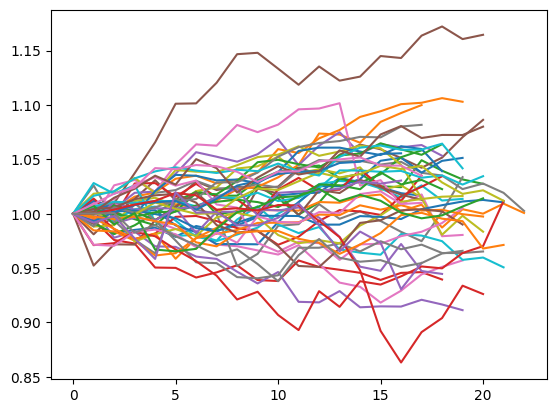

In [51]:
#日足データ
topix_close=[]
topix_index=[]
topix_volume=[]
MinMax_close=[]
MinMax_index=[]
for file in file_names[:48]:
        data=pd.read_csv(file,header=0)
        #正規化のクラスを準備
        ms = MinMaxScaler()
        #特徴量の最大値と最小値を計算し変換
        X = np.array(data["Close"]).reshape(-1,1)
        data["MinMax_Close"] = ms.fit_transform(X)#最小値0最大値1の正規化
        a=data["Close"][0]#日の始値
        b=data["MinMax_Close"][0]#日の始値
        data["MinMax_index"]=data["Close"]
        data["index"]=data["Close"]
        for i in range(len(data.index)):
            data["index"][i]=data["Close"][i]/a
            data["MinMax_index"][i]=data["MinMax_Close"][i]/b
        topix_close.append(data["Close"].tail(1).values)
        topix_index.append(data["index"].values)
        topix_volume.append(data["Volume"].values)
        MinMax_close.append(data["MinMax_Close"].values)
        MinMax_index.append(data["MinMax_index"].values)
df_topix_index=pd.DataFrame(topix_index,index=train_data_date)
df_topix_close=pd.DataFrame(topix_close,index=train_data_date)
df_topix_volume=pd.DataFrame(topix_volume,index=train_data_date)
df_MinMax_close=pd.DataFrame(MinMax_close,index=train_data_date)
df_MinMax_index=pd.DataFrame(MinMax_index,index=train_data_date)
#可視化　
plt.plot(df_topix_index.T)
#plt.plot(df_MinMax_index.T)

In [52]:
#15分足のデータ
file_15min=['15min/2012-01-04.csv', '15min/2012-01-05.csv', '15min/2012-01-06.csv', '15min/2012-01-10.csv', '15min/2012-01-11.csv', '15min/2012-01-12.csv', '15min/2012-01-13.csv', '15min/2012-01-16.csv', '15min/2012-01-17.csv', '15min/2012-01-18.csv', '15min/2012-01-19.csv', '15min/2012-01-20.csv', '15min/2012-01-23.csv', '15min/2012-01-24.csv', '15min/2012-01-25.csv', '15min/2012-01-26.csv', '15min/2012-01-27.csv', '15min/2012-01-30.csv', '15min/2012-01-31.csv', '15min/2012-02-01.csv', '15min/2012-02-02.csv', '15min/2012-02-03.csv', '15min/2012-02-06.csv', '15min/2012-02-07.csv', '15min/2012-02-08.csv', '15min/2012-02-09.csv', '15min/2012-02-10.csv', '15min/2012-02-13.csv', '15min/2012-02-14.csv', '15min/2012-02-15.csv', '15min/2012-02-16.csv', '15min/2012-02-17.csv', '15min/2012-02-20.csv', '15min/2012-02-21.csv', '15min/2012-02-22.csv', '15min/2012-02-23.csv', '15min/2012-02-24.csv', '15min/2012-02-27.csv', '15min/2012-02-28.csv', '15min/2012-02-29.csv', '15min/2012-03-01.csv', '15min/2012-03-02.csv', '15min/2012-03-05.csv', '15min/2012-03-06.csv', '15min/2012-03-07.csv', '15min/2012-03-08.csv', '15min/2012-03-09.csv', '15min/2012-03-12.csv', '15min/2012-03-13.csv', '15min/2012-03-14.csv', '15min/2012-03-15.csv', '15min/2012-03-16.csv', '15min/2012-03-19.csv', '15min/2012-03-21.csv', '15min/2012-03-22.csv', '15min/2012-03-23.csv', '15min/2012-03-26.csv', '15min/2012-03-27.csv', '15min/2012-03-28.csv', '15min/2012-03-29.csv', '15min/2012-03-30.csv', '15min/2012-04-01.csv', '15min/2012-04-02.csv', '15min/2012-04-03.csv', '15min/2012-04-04.csv', '15min/2012-04-05.csv', '15min/2012-04-06.csv', '15min/2012-04-09.csv', '15min/2012-04-10.csv', '15min/2012-04-11.csv', '15min/2012-04-12.csv', '15min/2012-04-13.csv', '15min/2012-04-16.csv', '15min/2012-04-17.csv', '15min/2012-04-18.csv', '15min/2012-04-19.csv', '15min/2012-04-20.csv', '15min/2012-04-23.csv', '15min/2012-04-24.csv', '15min/2012-04-25.csv', '15min/2012-04-26.csv', '15min/2012-04-27.csv', '15min/2012-05-01.csv', '15min/2012-05-02.csv', '15min/2012-05-07.csv', '15min/2012-05-08.csv', '15min/2012-05-09.csv', '15min/2012-05-10.csv', '15min/2012-05-11.csv', '15min/2012-05-14.csv', '15min/2012-05-15.csv', '15min/2012-05-16.csv', '15min/2012-05-17.csv', '15min/2012-05-18.csv', '15min/2012-05-21.csv', '15min/2012-05-22.csv', '15min/2012-05-23.csv', '15min/2012-05-24.csv', '15min/2012-05-25.csv', '15min/2012-05-28.csv', '15min/2012-05-29.csv', '15min/2012-05-30.csv', '15min/2012-05-31.csv', '15min/2012-06-01.csv', '15min/2012-06-04.csv', '15min/2012-06-05.csv', '15min/2012-06-06.csv', '15min/2012-06-07.csv', '15min/2012-06-08.csv', '15min/2012-06-11.csv', '15min/2012-06-12.csv', '15min/2012-06-13.csv', '15min/2012-06-14.csv', '15min/2012-06-15.csv', '15min/2012-06-18.csv', '15min/2012-06-19.csv', '15min/2012-06-20.csv', '15min/2012-06-21.csv', '15min/2012-06-22.csv', '15min/2012-06-25.csv', '15min/2012-06-26.csv', '15min/2012-06-27.csv', '15min/2012-06-28.csv', '15min/2012-06-29.csv', '15min/2012-07-01.csv', '15min/2012-07-02.csv', '15min/2012-07-03.csv', '15min/2012-07-04.csv', '15min/2012-07-05.csv', '15min/2012-07-06.csv', '15min/2012-07-09.csv', '15min/2012-07-10.csv', '15min/2012-07-11.csv', '15min/2012-07-12.csv', '15min/2012-07-13.csv', '15min/2012-07-17.csv', '15min/2012-07-18.csv', '15min/2012-07-19.csv', '15min/2012-07-20.csv', '15min/2012-07-23.csv', '15min/2012-07-24.csv', '15min/2012-07-25.csv', '15min/2012-07-26.csv', '15min/2012-07-27.csv', '15min/2012-07-30.csv', '15min/2012-07-31.csv', '15min/2012-08-01.csv', '15min/2012-08-02.csv', '15min/2012-08-03.csv', '15min/2012-08-06.csv', '15min/2012-08-07.csv', '15min/2012-08-08.csv', '15min/2012-08-09.csv', '15min/2012-08-10.csv', '15min/2012-08-13.csv', '15min/2012-08-14.csv', '15min/2012-08-15.csv', '15min/2012-08-16.csv', '15min/2012-08-17.csv', '15min/2012-08-20.csv', '15min/2012-08-21.csv', '15min/2012-08-22.csv', '15min/2012-08-23.csv', '15min/2012-08-24.csv', '15min/2012-08-27.csv', '15min/2012-08-28.csv', '15min/2012-08-29.csv', '15min/2012-08-30.csv', '15min/2012-08-31.csv', '15min/2012-09-01.csv', '15min/2012-09-03.csv', '15min/2012-09-04.csv', '15min/2012-09-05.csv', '15min/2012-09-06.csv', '15min/2012-09-07.csv', '15min/2012-09-10.csv', '15min/2012-09-11.csv', '15min/2012-09-12.csv', '15min/2012-09-13.csv', '15min/2012-09-14.csv', '15min/2012-09-18.csv', '15min/2012-09-19.csv', '15min/2012-09-20.csv', '15min/2012-09-21.csv', '15min/2012-09-24.csv', '15min/2012-09-25.csv', '15min/2012-09-26.csv', '15min/2012-09-27.csv', '15min/2012-09-28.csv', '15min/2012-10-01.csv', '15min/2012-10-02.csv', '15min/2012-10-03.csv', '15min/2012-10-04.csv', '15min/2012-10-05.csv', '15min/2012-10-09.csv', '15min/2012-10-10.csv', '15min/2012-10-11.csv', '15min/2012-10-12.csv', '15min/2012-10-15.csv', '15min/2012-10-16.csv', '15min/2012-10-17.csv', '15min/2012-10-18.csv', '15min/2012-10-19.csv', '15min/2012-10-22.csv', '15min/2012-10-23.csv', '15min/2012-10-24.csv', '15min/2012-10-25.csv', '15min/2012-10-26.csv', '15min/2012-10-29.csv', '15min/2012-10-30.csv', '15min/2012-10-31.csv', '15min/2012-11-01.csv', '15min/2012-11-02.csv', '15min/2012-11-05.csv', '15min/2012-11-06.csv', '15min/2012-11-07.csv', '15min/2012-11-08.csv', '15min/2012-11-09.csv', '15min/2012-11-12.csv', '15min/2012-11-13.csv', '15min/2012-11-14.csv', '15min/2012-11-15.csv', '15min/2012-11-16.csv', '15min/2012-11-19.csv', '15min/2012-11-20.csv', '15min/2012-11-21.csv', '15min/2012-11-22.csv', '15min/2012-11-26.csv', '15min/2012-11-27.csv', '15min/2012-11-28.csv', '15min/2012-11-29.csv', '15min/2012-11-30.csv', '15min/2012-12-01.csv', '15min/2012-12-03.csv', '15min/2012-12-04.csv', '15min/2012-12-05.csv', '15min/2012-12-06.csv', '15min/2012-12-07.csv', '15min/2012-12-10.csv', '15min/2012-12-11.csv', '15min/2012-12-12.csv', '15min/2012-12-13.csv', '15min/2012-12-14.csv', '15min/2012-12-17.csv', '15min/2012-12-18.csv', '15min/2012-12-19.csv', '15min/2012-12-20.csv', '15min/2012-12-21.csv', '15min/2012-12-25.csv', '15min/2012-12-26.csv', '15min/2012-12-27.csv', '15min/2012-12-28.csv', '15min/2013-01-04.csv', '15min/2013-01-07.csv', '15min/2013-01-08.csv', '15min/2013-01-09.csv', '15min/2013-01-10.csv', '15min/2013-01-11.csv', '15min/2013-01-15.csv', '15min/2013-01-16.csv', '15min/2013-01-17.csv', '15min/2013-01-18.csv', '15min/2013-01-21.csv', '15min/2013-01-22.csv', '15min/2013-01-23.csv', '15min/2013-01-24.csv', '15min/2013-01-25.csv', '15min/2013-01-28.csv', '15min/2013-01-29.csv', '15min/2013-01-30.csv', '15min/2013-01-31.csv', '15min/2013-02-01.csv', '15min/2013-02-04.csv', '15min/2013-02-05.csv', '15min/2013-02-06.csv', '15min/2013-02-07.csv', '15min/2013-02-08.csv', '15min/2013-02-12.csv', '15min/2013-02-13.csv', '15min/2013-02-14.csv', '15min/2013-02-15.csv', '15min/2013-02-18.csv', '15min/2013-02-19.csv', '15min/2013-02-20.csv', '15min/2013-02-21.csv', '15min/2013-02-22.csv', '15min/2013-02-25.csv', '15min/2013-02-26.csv', '15min/2013-02-27.csv', '15min/2013-02-28.csv', '15min/2013-03-01.csv', '15min/2013-03-04.csv', '15min/2013-03-05.csv', '15min/2013-03-06.csv', '15min/2013-03-07.csv', '15min/2013-03-08.csv', '15min/2013-03-11.csv', '15min/2013-03-12.csv', '15min/2013-03-13.csv', '15min/2013-03-14.csv', '15min/2013-03-15.csv', '15min/2013-03-18.csv', '15min/2013-03-19.csv', '15min/2013-03-21.csv', '15min/2013-03-22.csv', '15min/2013-03-25.csv', '15min/2013-03-26.csv', '15min/2013-03-27.csv', '15min/2013-03-28.csv', '15min/2013-03-29.csv', '15min/2013-04-01.csv', '15min/2013-04-02.csv', '15min/2013-04-03.csv', '15min/2013-04-04.csv', '15min/2013-04-05.csv', '15min/2013-04-08.csv', '15min/2013-04-09.csv', '15min/2013-04-10.csv', '15min/2013-04-11.csv', '15min/2013-04-12.csv', '15min/2013-04-15.csv', '15min/2013-04-16.csv', '15min/2013-04-17.csv', '15min/2013-04-18.csv', '15min/2013-04-19.csv', '15min/2013-04-22.csv', '15min/2013-04-23.csv', '15min/2013-04-24.csv', '15min/2013-04-25.csv', '15min/2013-04-26.csv', '15min/2013-04-30.csv', '15min/2013-05-01.csv', '15min/2013-05-02.csv', '15min/2013-05-07.csv', '15min/2013-05-08.csv', '15min/2013-05-09.csv', '15min/2013-05-10.csv', '15min/2013-05-13.csv', '15min/2013-05-14.csv', '15min/2013-05-15.csv', '15min/2013-05-16.csv', '15min/2013-05-17.csv', '15min/2013-05-20.csv', '15min/2013-05-21.csv', '15min/2013-05-22.csv', '15min/2013-05-23.csv', '15min/2013-05-24.csv', '15min/2013-05-27.csv', '15min/2013-05-28.csv', '15min/2013-05-29.csv', '15min/2013-05-30.csv', '15min/2013-05-31.csv', '15min/2013-06-03.csv', '15min/2013-06-04.csv', '15min/2013-06-05.csv', '15min/2013-06-06.csv', '15min/2013-06-07.csv', '15min/2013-06-10.csv', '15min/2013-06-11.csv', '15min/2013-06-12.csv', '15min/2013-06-13.csv', '15min/2013-06-14.csv', '15min/2013-06-17.csv', '15min/2013-06-18.csv', '15min/2013-06-19.csv', '15min/2013-06-20.csv', '15min/2013-06-21.csv', '15min/2013-06-24.csv', '15min/2013-06-25.csv', '15min/2013-06-26.csv', '15min/2013-06-27.csv', '15min/2013-06-28.csv', '15min/2013-07-01.csv', '15min/2013-07-02.csv', '15min/2013-07-03.csv', '15min/2013-07-04.csv', '15min/2013-07-05.csv', '15min/2013-07-08.csv', '15min/2013-07-09.csv', '15min/2013-07-10.csv', '15min/2013-07-11.csv', '15min/2013-07-12.csv', '15min/2013-07-16.csv', '15min/2013-07-17.csv', '15min/2013-07-18.csv', '15min/2013-07-19.csv', '15min/2013-07-22.csv', '15min/2013-07-23.csv', '15min/2013-07-24.csv', '15min/2013-07-25.csv', '15min/2013-07-26.csv', '15min/2013-07-29.csv', '15min/2013-07-30.csv', '15min/2013-07-31.csv', '15min/2013-08-01.csv', '15min/2013-08-02.csv', '15min/2013-08-05.csv', '15min/2013-08-06.csv', '15min/2013-08-07.csv', '15min/2013-08-08.csv', '15min/2013-08-09.csv', '15min/2013-08-12.csv', '15min/2013-08-13.csv', '15min/2013-08-14.csv', '15min/2013-08-15.csv', '15min/2013-08-16.csv', '15min/2013-08-19.csv', '15min/2013-08-20.csv', '15min/2013-08-21.csv', '15min/2013-08-22.csv', '15min/2013-08-23.csv', '15min/2013-08-26.csv', '15min/2013-08-27.csv', '15min/2013-08-28.csv', '15min/2013-08-29.csv', '15min/2013-08-30.csv', '15min/2013-09-02.csv', 
            '15min/2013-09-03.csv', '15min/2013-09-04.csv', '15min/2013-09-05.csv', '15min/2013-09-06.csv', '15min/2013-09-09.csv', '15min/2013-09-10.csv', '15min/2013-09-11.csv', '15min/2013-09-12.csv', '15min/2013-09-13.csv', '15min/2013-09-17.csv', '15min/2013-09-18.csv', '15min/2013-09-19.csv', '15min/2013-09-20.csv', '15min/2013-09-24.csv', '15min/2013-09-25.csv', '15min/2013-09-26.csv', '15min/2013-09-27.csv', '15min/2013-09-30.csv', '15min/2013-10-01.csv', '15min/2013-10-02.csv', '15min/2013-10-03.csv', '15min/2013-10-04.csv', '15min/2013-10-07.csv', '15min/2013-10-08.csv', '15min/2013-10-09.csv', '15min/2013-10-10.csv', '15min/2013-10-11.csv', '15min/2013-10-15.csv', '15min/2013-10-16.csv', '15min/2013-10-17.csv', '15min/2013-10-18.csv', '15min/2013-10-21.csv', '15min/2013-10-22.csv', '15min/2013-10-23.csv', '15min/2013-10-24.csv', '15min/2013-10-25.csv', '15min/2013-10-28.csv', '15min/2013-10-29.csv', '15min/2013-10-30.csv', '15min/2013-10-31.csv', '15min/2013-11-01.csv', '15min/2013-11-05.csv', '15min/2013-11-06.csv', '15min/2013-11-07.csv', '15min/2013-11-08.csv', '15min/2013-11-11.csv', '15min/2013-11-12.csv', '15min/2013-11-13.csv', '15min/2013-11-14.csv', '15min/2013-11-15.csv', '15min/2013-11-18.csv', '15min/2013-11-19.csv', '15min/2013-11-20.csv', '15min/2013-11-21.csv', '15min/2013-11-22.csv', '15min/2013-11-25.csv', '15min/2013-11-26.csv', '15min/2013-11-27.csv', '15min/2013-11-28.csv', '15min/2013-11-29.csv', '15min/2013-12-02.csv', '15min/2013-12-03.csv', '15min/2013-12-04.csv', '15min/2013-12-05.csv', '15min/2013-12-06.csv', '15min/2013-12-09.csv', '15min/2013-12-10.csv', '15min/2013-12-11.csv', '15min/2013-12-12.csv', '15min/2013-12-13.csv', '15min/2013-12-16.csv', '15min/2013-12-17.csv', '15min/2013-12-18.csv', '15min/2013-12-19.csv', '15min/2013-12-20.csv', '15min/2013-12-24.csv', '15min/2013-12-25.csv', '15min/2013-12-26.csv', '15min/2013-12-27.csv', '15min/2013-12-30.csv', '15min/2014-01-06.csv', '15min/2014-01-07.csv', '15min/2014-01-08.csv', '15min/2014-01-09.csv', '15min/2014-01-10.csv', '15min/2014-01-14.csv', '15min/2014-01-15.csv', '15min/2014-01-16.csv', '15min/2014-01-17.csv', '15min/2014-01-20.csv', '15min/2014-01-21.csv', '15min/2014-01-22.csv', '15min/2014-01-23.csv', '15min/2014-01-24.csv', '15min/2014-01-27.csv', '15min/2014-01-28.csv', '15min/2014-01-29.csv', '15min/2014-01-30.csv', '15min/2014-01-31.csv', '15min/2014-02-03.csv', '15min/2014-02-04.csv', '15min/2014-02-05.csv', '15min/2014-02-06.csv', '15min/2014-02-07.csv', '15min/2014-02-10.csv', '15min/2014-02-12.csv', '15min/2014-02-13.csv', '15min/2014-02-14.csv', '15min/2014-02-17.csv', '15min/2014-02-18.csv', '15min/2014-02-19.csv', '15min/2014-02-20.csv', '15min/2014-02-21.csv', '15min/2014-02-24.csv', '15min/2014-02-25.csv', '15min/2014-02-26.csv', '15min/2014-02-27.csv', '15min/2014-02-28.csv', '15min/2014-03-03.csv', '15min/2014-03-04.csv', '15min/2014-03-05.csv', '15min/2014-03-06.csv', '15min/2014-03-07.csv', '15min/2014-03-10.csv', '15min/2014-03-11.csv', '15min/2014-03-12.csv', '15min/2014-03-13.csv', '15min/2014-03-14.csv', '15min/2014-03-17.csv', '15min/2014-03-18.csv', '15min/2014-03-19.csv', '15min/2014-03-20.csv', '15min/2014-03-24.csv', '15min/2014-03-25.csv', '15min/2014-03-26.csv', '15min/2014-03-27.csv', '15min/2014-03-28.csv', '15min/2014-03-31.csv', '15min/2014-04-01.csv', '15min/2014-04-02.csv', '15min/2014-04-03.csv', '15min/2014-04-04.csv', '15min/2014-04-07.csv', '15min/2014-04-08.csv', '15min/2014-04-09.csv', '15min/2014-04-10.csv', '15min/2014-04-11.csv', '15min/2014-04-14.csv', '15min/2014-04-15.csv', '15min/2014-04-16.csv', '15min/2014-04-17.csv', '15min/2014-04-18.csv', '15min/2014-04-21.csv', '15min/2014-04-22.csv', '15min/2014-04-23.csv', '15min/2014-04-24.csv', '15min/2014-04-25.csv', '15min/2014-04-28.csv', '15min/2014-04-30.csv', '15min/2014-05-01.csv', '15min/2014-05-02.csv', '15min/2014-05-07.csv', '15min/2014-05-08.csv', '15min/2014-05-09.csv', '15min/2014-05-12.csv', '15min/2014-05-13.csv', '15min/2014-05-14.csv', '15min/2014-05-15.csv', '15min/2014-05-16.csv', '15min/2014-05-19.csv', '15min/2014-05-20.csv', '15min/2014-05-21.csv', '15min/2014-05-22.csv', '15min/2014-05-23.csv', '15min/2014-05-26.csv', '15min/2014-05-27.csv', '15min/2014-05-28.csv', '15min/2014-05-29.csv', '15min/2014-05-30.csv', '15min/2014-06-02.csv', '15min/2014-06-03.csv', '15min/2014-06-04.csv', '15min/2014-06-05.csv', '15min/2014-06-06.csv', '15min/2014-06-09.csv', '15min/2014-06-10.csv', '15min/2014-06-11.csv', '15min/2014-06-12.csv', '15min/2014-06-13.csv', '15min/2014-06-16.csv', '15min/2014-06-17.csv', '15min/2014-06-18.csv', '15min/2014-06-19.csv', '15min/2014-06-20.csv', '15min/2014-06-23.csv', '15min/2014-06-24.csv', '15min/2014-06-25.csv', '15min/2014-06-26.csv', '15min/2014-06-27.csv', '15min/2014-06-30.csv', '15min/2014-07-01.csv', '15min/2014-07-02.csv', '15min/2014-07-03.csv', '15min/2014-07-04.csv', '15min/2014-07-07.csv', '15min/2014-07-08.csv', '15min/2014-07-09.csv', '15min/2014-07-10.csv', '15min/2014-07-11.csv', '15min/2014-07-14.csv', '15min/2014-07-15.csv', '15min/2014-07-16.csv', '15min/2014-07-17.csv', '15min/2014-07-18.csv', '15min/2014-07-22.csv', '15min/2014-07-23.csv', '15min/2014-07-24.csv', '15min/2014-07-25.csv', '15min/2014-07-28.csv', '15min/2014-07-29.csv', '15min/2014-07-30.csv', '15min/2014-07-31.csv', '15min/2014-08-01.csv', '15min/2014-08-04.csv', '15min/2014-08-05.csv', '15min/2014-08-06.csv', '15min/2014-08-07.csv', '15min/2014-08-08.csv', '15min/2014-08-11.csv', '15min/2014-08-12.csv', '15min/2014-08-13.csv', '15min/2014-08-14.csv', '15min/2014-08-15.csv', '15min/2014-08-18.csv', '15min/2014-08-19.csv', '15min/2014-08-20.csv', '15min/2014-08-21.csv', '15min/2014-08-22.csv', '15min/2014-08-25.csv', '15min/2014-08-26.csv', '15min/2014-08-27.csv', '15min/2014-08-28.csv', '15min/2014-08-29.csv', '15min/2014-09-01.csv', '15min/2014-09-02.csv', '15min/2014-09-03.csv', '15min/2014-09-04.csv', '15min/2014-09-05.csv', '15min/2014-09-08.csv', '15min/2014-09-09.csv', '15min/2014-09-10.csv', '15min/2014-09-11.csv', '15min/2014-09-12.csv', '15min/2014-09-16.csv', '15min/2014-09-17.csv', '15min/2014-09-18.csv', '15min/2014-09-19.csv', '15min/2014-09-22.csv', '15min/2014-09-24.csv', '15min/2014-09-25.csv', '15min/2014-09-26.csv', '15min/2014-09-29.csv', '15min/2014-09-30.csv', '15min/2014-10-01.csv', '15min/2014-10-02.csv', '15min/2014-10-03.csv', '15min/2014-10-06.csv', '15min/2014-10-07.csv', '15min/2014-10-08.csv', '15min/2014-10-09.csv', '15min/2014-10-10.csv', '15min/2014-10-14.csv', '15min/2014-10-15.csv', '15min/2014-10-16.csv', '15min/2014-10-17.csv', '15min/2014-10-20.csv', '15min/2014-10-21.csv', '15min/2014-10-22.csv', '15min/2014-10-23.csv', '15min/2014-10-24.csv', '15min/2014-10-27.csv', '15min/2014-10-28.csv', '15min/2014-10-29.csv', '15min/2014-10-30.csv', '15min/2014-10-31.csv', '15min/2014-11-01.csv', '15min/2014-11-04.csv', '15min/2014-11-05.csv', '15min/2014-11-06.csv', '15min/2014-11-07.csv', '15min/2014-11-10.csv', '15min/2014-11-11.csv', '15min/2014-11-12.csv', '15min/2014-11-13.csv', '15min/2014-11-14.csv', '15min/2014-11-17.csv', '15min/2014-11-18.csv', '15min/2014-11-19.csv', '15min/2014-11-20.csv', '15min/2014-11-21.csv', '15min/2014-11-25.csv', '15min/2014-11-26.csv', '15min/2014-11-27.csv', '15min/2014-11-28.csv', '15min/2014-12-01.csv', '15min/2014-12-02.csv', '15min/2014-12-03.csv', '15min/2014-12-04.csv', '15min/2014-12-05.csv', '15min/2014-12-08.csv', '15min/2014-12-09.csv', '15min/2014-12-10.csv', '15min/2014-12-11.csv', '15min/2014-12-12.csv', '15min/2014-12-15.csv', '15min/2014-12-16.csv', '15min/2014-12-17.csv', '15min/2014-12-18.csv', '15min/2014-12-19.csv', '15min/2014-12-22.csv', '15min/2014-12-24.csv', '15min/2014-12-25.csv', '15min/2014-12-26.csv', '15min/2014-12-29.csv', '15min/2014-12-30.csv', '15min/2015-01-05.csv', '15min/2015-01-06.csv', '15min/2015-01-07.csv', '15min/2015-01-08.csv', '15min/2015-01-09.csv', '15min/2015-01-13.csv', '15min/2015-01-14.csv', '15min/2015-01-15.csv', '15min/2015-01-16.csv', '15min/2015-01-19.csv', '15min/2015-01-20.csv', '15min/2015-01-21.csv', '15min/2015-01-22.csv', '15min/2015-01-23.csv', '15min/2015-01-26.csv', '15min/2015-01-27.csv', '15min/2015-01-28.csv', '15min/2015-01-29.csv', '15min/2015-01-30.csv', '15min/2015-02-01.csv', '15min/2015-02-02.csv', '15min/2015-02-03.csv', '15min/2015-02-04.csv', '15min/2015-02-05.csv', '15min/2015-02-06.csv', '15min/2015-02-09.csv', '15min/2015-02-10.csv', '15min/2015-02-12.csv', '15min/2015-02-13.csv', '15min/2015-02-16.csv', '15min/2015-02-17.csv', '15min/2015-02-18.csv', '15min/2015-02-19.csv', '15min/2015-02-20.csv', '15min/2015-02-23.csv', '15min/2015-02-24.csv', '15min/2015-02-25.csv', '15min/2015-02-26.csv', '15min/2015-02-27.csv', '15min/2015-03-01.csv', '15min/2015-03-02.csv', '15min/2015-03-03.csv', '15min/2015-03-04.csv', '15min/2015-03-05.csv', '15min/2015-03-06.csv', '15min/2015-03-09.csv', '15min/2015-03-10.csv', '15min/2015-03-11.csv', '15min/2015-03-12.csv', '15min/2015-03-13.csv', '15min/2015-03-16.csv', '15min/2015-03-17.csv', '15min/2015-03-18.csv', '15min/2015-03-19.csv', '15min/2015-03-20.csv', '15min/2015-03-23.csv', '15min/2015-03-24.csv', '15min/2015-03-25.csv', '15min/2015-03-26.csv', '15min/2015-03-27.csv', '15min/2015-03-30.csv', '15min/2015-03-31.csv', '15min/2015-04-01.csv', '15min/2015-04-02.csv', '15min/2015-04-03.csv', '15min/2015-04-06.csv', '15min/2015-04-07.csv', '15min/2015-04-08.csv', '15min/2015-04-09.csv', '15min/2015-04-10.csv', '15min/2015-04-13.csv', '15min/2015-04-14.csv', '15min/2015-04-15.csv', '15min/2015-04-16.csv', '15min/2015-04-17.csv', '15min/2015-04-20.csv', '15min/2015-04-21.csv', '15min/2015-04-22.csv', '15min/2015-04-23.csv', '15min/2015-04-24.csv', '15min/2015-04-27.csv', '15min/2015-04-28.csv', '15min/2015-04-30.csv', '15min/2015-05-01.csv', '15min/2015-05-07.csv', '15min/2015-05-08.csv', '15min/2015-05-11.csv', '15min/2015-05-12.csv', '15min/2015-05-13.csv', '15min/2015-05-14.csv', '15min/2015-05-15.csv', '15min/2015-05-18.csv', 
            '15min/2015-05-19.csv', '15min/2015-05-20.csv', '15min/2015-05-21.csv', '15min/2015-05-22.csv', '15min/2015-05-25.csv', '15min/2015-05-26.csv', '15min/2015-05-27.csv', '15min/2015-05-28.csv', '15min/2015-05-29.csv', '15min/2015-06-01.csv', '15min/2015-06-02.csv', '15min/2015-06-03.csv', '15min/2015-06-04.csv', '15min/2015-06-05.csv', '15min/2015-06-08.csv', '15min/2015-06-09.csv', '15min/2015-06-10.csv', '15min/2015-06-11.csv', '15min/2015-06-12.csv', '15min/2015-06-15.csv', '15min/2015-06-16.csv', '15min/2015-06-17.csv', '15min/2015-06-18.csv', '15min/2015-06-19.csv', '15min/2015-06-22.csv', '15min/2015-06-23.csv', '15min/2015-06-24.csv', '15min/2015-06-25.csv', '15min/2015-06-26.csv', '15min/2015-06-29.csv', '15min/2015-06-30.csv', '15min/2015-07-01.csv', '15min/2015-07-02.csv', '15min/2015-07-03.csv', '15min/2015-07-06.csv', '15min/2015-07-07.csv', '15min/2015-07-08.csv', '15min/2015-07-09.csv', '15min/2015-07-10.csv', '15min/2015-07-13.csv', '15min/2015-07-14.csv', '15min/2015-07-15.csv', '15min/2015-07-16.csv', '15min/2015-07-17.csv', '15min/2015-07-21.csv', '15min/2015-07-22.csv', '15min/2015-07-23.csv', '15min/2015-07-24.csv', '15min/2015-07-27.csv', '15min/2015-07-28.csv', '15min/2015-07-29.csv', '15min/2015-07-30.csv', '15min/2015-07-31.csv', '15min/2015-08-01.csv', '15min/2015-08-03.csv', '15min/2015-08-04.csv', '15min/2015-08-05.csv', '15min/2015-08-06.csv', '15min/2015-08-07.csv', '15min/2015-08-10.csv', '15min/2015-08-11.csv', '15min/2015-08-12.csv', '15min/2015-08-13.csv', '15min/2015-08-14.csv', '15min/2015-08-17.csv', '15min/2015-08-18.csv', '15min/2015-08-19.csv', '15min/2015-08-20.csv', '15min/2015-08-21.csv', '15min/2015-08-24.csv', '15min/2015-08-25.csv', '15min/2015-08-26.csv', '15min/2015-08-27.csv', '15min/2015-08-28.csv', '15min/2015-08-31.csv', '15min/2015-09-01.csv', '15min/2015-09-02.csv', '15min/2015-09-03.csv', '15min/2015-09-04.csv', '15min/2015-09-07.csv', '15min/2015-09-08.csv', '15min/2015-09-09.csv', '15min/2015-09-10.csv', '15min/2015-09-11.csv', '15min/2015-09-14.csv', '15min/2015-09-15.csv', '15min/2015-09-16.csv', '15min/2015-09-17.csv', '15min/2015-09-18.csv', '15min/2015-09-24.csv', '15min/2015-09-25.csv', '15min/2015-09-28.csv', '15min/2015-09-29.csv', '15min/2015-09-30.csv', '15min/2015-10-01.csv', '15min/2015-10-02.csv', '15min/2015-10-05.csv', '15min/2015-10-06.csv', '15min/2015-10-07.csv', '15min/2015-10-08.csv', '15min/2015-10-09.csv', '15min/2015-10-13.csv', '15min/2015-10-14.csv', '15min/2015-10-15.csv', '15min/2015-10-16.csv', '15min/2015-10-19.csv', '15min/2015-10-20.csv', '15min/2015-10-21.csv', '15min/2015-10-22.csv', '15min/2015-10-23.csv', '15min/2015-10-26.csv', '15min/2015-10-27.csv', '15min/2015-10-28.csv', '15min/2015-10-29.csv', '15min/2015-10-30.csv', '15min/2015-11-01.csv', '15min/2015-11-02.csv', '15min/2015-11-04.csv', '15min/2015-11-05.csv', '15min/2015-11-06.csv', '15min/2015-11-09.csv', '15min/2015-11-10.csv', '15min/2015-11-11.csv', '15min/2015-11-12.csv', '15min/2015-11-13.csv', '15min/2015-11-16.csv', '15min/2015-11-17.csv', '15min/2015-11-18.csv', '15min/2015-11-19.csv', '15min/2015-11-20.csv', '15min/2015-11-24.csv', '15min/2015-11-25.csv', '15min/2015-11-26.csv', '15min/2015-11-27.csv', '15min/2015-11-30.csv', '15min/2015-12-01.csv', '15min/2015-12-02.csv', '15min/2015-12-03.csv', '15min/2015-12-04.csv', '15min/2015-12-07.csv', '15min/2015-12-08.csv', '15min/2015-12-09.csv', '15min/2015-12-10.csv', '15min/2015-12-11.csv', '15min/2015-12-14.csv', '15min/2015-12-15.csv', '15min/2015-12-16.csv', '15min/2015-12-17.csv', '15min/2015-12-18.csv', '15min/2015-12-21.csv', '15min/2015-12-22.csv', '15min/2015-12-24.csv', '15min/2015-12-25.csv', '15min/2015-12-28.csv', '15min/2015-12-29.csv', '15min/2015-12-30.csv']
train15min_data_date=[]
import os
for i in range(len(file_15min)):
    basename_without_ext = os.path.splitext(os.path.basename(file_15min[i]))[0]
    train15min_data_date.append(basename_without_ext)
topix15min_index=[]
topix15min_close=[]
topix15min_volume=[]
MinMax15min_index=[]
MinMax15min_close=[]
for file in file_15min:
        data=pd.read_csv(file,header=0)
        #正規化のクラスを準備
        ms = MinMaxScaler()
        #特徴量の最大値と最小値を計算し変換
        X = np.array(data["Close"]).reshape(-1,1)
        data["MinMax_Close"] = ms.fit_transform(X)#最小値0最大値1の正規化
        a=data["Close"][0]#日の始値
        b=data["MinMax_Close"][0]#日の始値
        data["MinMax_index"]=data["Close"]
        data["index"]=data["Close"]
        for i in range(len(data.index)):
            data["index"][i]=data["Close"][i]/a
            data["MinMax_index"][i]=data["MinMax_Close"][i]/b
        #data.to_csv(file, encoding="shift_jis")
        topix15min_close.append(data["Close"].tail(1).values)
        topix15min_index.append(data["index"].values)
        topix15min_volume.append(data["Volume"].values)
        MinMax15min_close.append(data["MinMax_Close"].values)
        MinMax15min_index.append(data["MinMax_index"].values)
df_topix15min_index=pd.DataFrame(topix15min_index,index=train15min_data_date)
df_topix15min_close=pd.DataFrame(topix15min_close,index=train15min_data_date)
df_topix15min_volume=pd.DataFrame(topix15min_volume,index=train15min_data_date)
df_MinMax15min_index=pd.DataFrame(MinMax15min_index,index=train15min_data_date)
df_MinMax15min_close=pd.DataFrame(MinMax15min_close,index=train15min_data_date)
#可視化
#plt.plot(df_topix15min_index.T)
#plt.plot(df_MinMax15min_index.T)

## 学習データの作成

In [56]:
topix_train=topix_index+topix15min_index
df_topix_train=pd.DataFrame(topix_train,index=train_data_date[:48]+train15min_data_date)
#len(df_topix_train)
all_file=file_names[:48]+file_15min
df_topix_train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
2012-01-01,1.0,0.990969,0.981978,0.985114,0.987187,0.978681,0.988708,0.984576,0.989219,0.996891,...,1.032854,1.029099,1.024415,1.018870,1.016528,NaN,NaN,NaN,NaN,NaN
2012-02-01,1.0,1.005924,1.003602,1.015687,1.019539,1.032165,1.035002,1.027851,1.031294,1.038049,...,1.076957,1.088976,1.094187,1.100704,1.101971,1.106232,1.102908,NaN,NaN,NaN
2012-03-01,1.0,1.007552,1.001587,0.994961,0.989381,1.005556,1.020648,1.016524,1.016584,1.030750,...,1.032759,1.036715,1.025242,1.024389,1.049162,1.039553,1.031508,1.027431,NaN,NaN
2012-04-01,1.0,0.994124,0.975831,0.972572,0.950517,0.950213,0.941347,0.946066,0.952608,0.938999,...,0.948473,0.945669,0.939127,0.945611,0.946323,0.939513,NaN,NaN,NaN,NaN
2012-05-01,1.0,1.004281,0.977922,0.983635,0.970031,0.969512,0.960595,0.958442,0.946687,0.935895,...,0.928866,0.913970,0.914831,0.914654,0.920886,0.916566,0.911335,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,1.0,0.999352,0.999352,0.997407,0.996759,0.996434,0.995462,0.996110,0.994814,0.994814,...,0.991248,0.991248,0.989627,0.989303,0.987682,0.987682,0.987358,0.985737,0.987034,NaN
2015-12-25,1.0,0.998028,0.997042,0.995399,0.996385,0.998357,1.000000,0.999343,0.997700,0.997371,...,0.995728,0.995399,0.995071,0.994742,0.993428,0.994742,0.994085,0.994742,0.995399,NaN
2015-12-28,1.0,0.998358,0.998686,1.000000,1.000328,1.000000,0.999343,1.000000,1.000000,1.000985,...,1.002299,1.002956,1.003941,1.005583,1.005255,1.004926,1.004926,1.003612,1.003941,NaN
2015-12-29,1.0,0.999016,1.000656,1.001639,1.003279,1.002951,1.004590,1.004590,1.004918,1.004590,...,1.010492,1.011148,1.013115,1.012787,1.011148,1.011148,1.012131,1.012787,1.011803,NaN


## DTWとk-medoids

In [57]:
#DTW計算
from fastdtw import fastdtw
distance=[]
path=[]
for i in range(len(topix_train)):
    print(len(topix_train)-i)
    for j in range(len(topix_train)):
        dist,pa=fastdtw(topix_train[i], topix_train[j])
        distance.append(dist)
        path.append(pa)
#listの分割　
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
result = list(split_list(distance, len(topix_train)))
#DTW行列
c=np.array(result)
#df_c=pd.DataFrame(c)
#df_c.to_csv("train_data.csv",encoding="shift_jis")

#k-medoids法
from sklearn_extra.cluster import KMedoids
import numpy as np
kmedoid=KMedoids(n_clusters=30, metric='euclidean', method='alternate', init='heuristic', max_iter=300, random_state=None).fit(c)
#cluster追加
df_topix_train["cluster"]=kmedoid.labels_

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## 月末終値と翌月の月末価格の上昇下落ラベル


In [80]:
#月末終値追加
m=[]
for file in all_file:
    data=pd.read_csv(file,header=0)
    m.append(int(data["Close"].tail(1).item()))
df_topix_train["month_close"]=m
#目的変数Upを追加する(翌日の月末が上がる場合1、それ以外は0とする)、'delta_Close'カラムの削除
df_topix_train['Up']=df_topix_train['cluster']
for i in range(len(df_topix_train['month_close'])-1):
    if df_topix_train['month_close'][i] < df_topix_train['month_close'][i+1]:
        df_topix_train['Up'][i]="up"
    else:
        df_topix_train['Up'][i]="down"
#df = df.drop('delta_Close', axis=1)
#df_test=df_topix_index[["cluster","month_close","Up"]]

In [214]:
df_topix_train.to_csv("topix_train30.csv",encoding="shift_jis")

In [4]:
df_topix_train=pd.read_csv("topix_train30.csv")

<h1>検証フェーズ</h1>

In [59]:
test_data_date=["2016-01-01","2016-02-01","2016-03-01","2016-04-01","2016-05-01","2016-06-01","2016-07-01","2016-08-01","2016-09-01","2016-10-01","2016-11-01","2016-12-01",
             "2017-01-01","2017-02-01","2017-03-01","2017-04-01","2017-05-01","2017-06-01","2017-07-01","2017-08-01","2017-09-01","2017-10-01","2017-11-01","2017-12-01",
             "2018-01-01","2018-02-01","2018-03-01","2018-04-01","2018-05-01","2018-06-01","2018-07-01","2018-08-01","2018-09-01","2018-10-01","2018-11-01","2018-12-01",
             "2019-01-01","2019-02-01","2019-03-01","2019-04-01","2019-05-01","2019-06-01","2019-07-01","2019-08-01","2019-09-01","2019-10-01","2019-11-01","2019-12-01",
             "2020-01-01","2020-02-01","2020-03-01","2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01"]
test_file_names=list(map(lambda s: s + '.csv',test_data_date ))
test_topix_close=[]
test_topix_index=[]
test_topix_volume=[]
test_MinMax_close=[]
test_MinMax_index=[]
for file in test_file_names:
    data=pd.read_csv(file,header=0)
    #正規化のクラスを準備
    ms = MinMaxScaler()
    #特徴量の最大値と最小値を計算し変換
    X = np.array(data["Close"]).reshape(-1,1)
    data["MinMax_Close"] = ms.fit_transform(X)#最小値0最大値1の正規化
    a=data["Close"][0]#日の始値
    b=data["MinMax_Close"][0]#日の始値
    data["MinMax_index"]=data["Close"]
    data["index"]=data["Close"]
    for i in range(len(data.index)):
        data["index"][i]=data["Close"][i]/a
        data["MinMax_index"][i]=data["MinMax_Close"][i]/b
    test_topix_close.append(data["Close"].tail(1).values)
    test_topix_index.append(data["index"].values)
    test_topix_volume.append(data["Volume"].values)
    test_MinMax_close.append(data["MinMax_Close"].values)
    test_MinMax_index.append(data["MinMax_index"].values)
df_test_topix_index=pd.DataFrame(test_topix_index,index=test_data_date)
df_test_topix_close=pd.DataFrame(test_topix_close,index=test_data_date)
df_test_topix_volume=pd.DataFrame(test_topix_volume,index=test_data_date)
df_test_MinMax_close=pd.DataFrame(test_MinMax_close,index=test_data_date)
df_test_MinMax_index=pd.DataFrame(test_MinMax_index,index=test_data_date)
#可視化　
#plt.plot(df_test_topix_index.T)
#plt.plot(df_MinMax_index.T)

## DTWとk-medoids

In [60]:
test_topix=topix_train
test_distance=[]
test_path=[]
#DTW
for i in range(len(test_topix_index)):#テストデータ数分繰り返す 2016-01-01から2020-12-01までの60ヵ月分
    #test_topix.append(test_topix_index[i])#学習データに追加
    print(len(test_topix_index)-i)
    for j in range(len(test_topix)):#データ数分繰り返す1039.40...
        test_dist,test_pa=fastdtw(test_topix_index[i], test_topix[j])
        test_distance.append(test_dist)
        test_path.append(test_pa)
test_result = list(split_list(test_distance,len(test_topix)))

#DTW行列
test_c=np.array(test_result)
#df_c=pd.DataFrame(c,index=datas,columns=datas)
#df_c.to_csv("dtw.csv",encoding="shift_jis")
#k-medoids法 
test_kmedoid=KMedoids(n_clusters=30, 
                       metric='euclidean', 
                       method='alternate', 
                       init='heuristic', 
                       max_iter=300, 
                       random_state=None).fit(test_c)
#cluster追加
#test_df_topix=pd.DataFrame(test_topix)
df_test_topix_index["cluster"]=test_kmedoid.labels_
df_test_topix_index.groupby('cluster').count().iloc[:,1]

60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


cluster
0     2
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    6
12    6
13    1
14    1
15    1
16    1
17    1
18    3
19    2
20    3
21    1
22    1
23    1
24    1
25    7
26    1
27    2
28    4
29    5
Name: 1, dtype: int64

In [123]:
df=pd.concat([df_topix_train,df_test_topix_index]) 
#翌月の月末価格の上昇下落ラベル
#月末終値追加
m=[]
return_graph=[]
sum_return=0
ruiseki_return=0
for file in test_file_names:
    data=pd.read_csv(file,header=0)
    m.append(int(data["Close"].tail(1).item()))
df_test_topix_index["month_close"]=df_test_topix_index['cluster']
df_test_topix_index["month_close"]=m

#正解ラベルの付与
#目的変数Upを追加する(翌日の月末が上がる場合1、それ以外は0とする)、
df_test_topix_index['Up']=df_test_topix_index['cluster']
for i in range(len(df_test_topix_index['month_close'])-1):
    if df_test_topix_index['month_close'][i] < df_test_topix_index['month_close'][i+1]:
        df_test_topix_index['Up'][i]="up"
    else:
        df_test_topix_index['Up'][i]="down"
    #df = df.drop('delta_Close', axis=1)
    #df_test=test_df_topix[["cluster","month_close","Up"]]
    
    for j in range(30):#クラスタ数回
        if df_test_topix_index["cluster"][i]==j:#クラスタ数の特定
        #クラスタ内の上昇（下落）ラベルの多数決
            n=df[df["cluster"]==j]
            n.reset_index(inplace=True)
            n["Time"] = pd.to_datetime(n["index"])
            up=int((n['Up']=="up").sum())#上昇ラベルの総数
            down=int((n["Up"]=="down").sum())#下落ラベルの総数
    if up>down:#上昇ラベルの方が多い場合
        #df_test_topix_index["pred_Up"]=df_test_topix_index["cluster"]
        df_test_topix_index["pred_Up"][i]="up"
        position=n["month_close"][i-1]#月末価格で購入
        next_month=n["Time"][i]+relativedelta(months=+1)#翌月
        #m_date=(n["Time"][j]+relativedelta(months=+1)).strftime('%Y-%m-%d')
        #m_date=pd.to_datetime(m_date)
        #df_test_topix_index.reset_index(inplace=True)
        #df_test_topix_index["Time"] = pd.to_datetime(df_test_topix_index.index)
        #n.set_index("index", inplace = True)
        #df_test_topix_index["Time"][0]+relativedelta(months=+1)
        #df_train["month_close"][df_train["Time"] [0] +relativedelta(months=+1).fromtimestamp(ts)]
        if next_month:#翌月の場合
            rikaku=df_test_topix_index["month_close"][i]#翌月価格
            profit=rikaku-position#翌月価格で売った時の収益
            month_return=(rikaku/position)-1#リターン％
            return_graph.append(month_return)
            ruiseki_return=(ruiseki_return+month_return+1)*100#累積収益率
        #sum=sum+profit#利益の合計
        #print("利益=",sum)
    #s.append(sum)#毎月の利益
    elif up<down:
        #df_test_topix_index["pred_Up"]=df_test_topix_index["cluster"]
        df_test_topix_index["pred_Up"][i]="down"
        position=n["month_close"][i]#月末価格で売却
            #df_test_topix_index["Time"] = pd.to_datetime(df_test_topix_index.index)
        next_month=n["Time"][i]+relativedelta(months=+1)#翌月
        if next_month:#翌月の場合
            rikaku=df_test_topix_index["month_close"][s]#翌月価格
            profit=position-rikaku#翌月価格で買った時の収益
            month_return=(rikaku/position)-1#リターン％
            return_graph.append(month_return)
            ruiseki_return=(ruiseki_return+month_return+1)*100#累積収益率
        #ruiseki_return=(1+month_return).cumprod()#累積収益率
        #sum=sum+profit#利益の合計
        #print("利益=",sum)
    #s.append(sum)

KeyError: -1

In [ ]:
if up>down:#上昇ラベルの方が多い場合
    #df_test_topix_index["pred_Up"]=df_test_topix_index["cluster"]
    df_test_topix_index["pred_Up"][i]="up"
    position=n["month_close"][t]#月末価格で購入
    next_month=n["Time"][t]+relativedelta(months=+1)#翌月
        #m_date=(n["Time"][j]+relativedelta(months=+1)).strftime('%Y-%m-%d')
        #m_date=pd.to_datetime(m_date)
        #df_test_topix_index.reset_index(inplace=True)
        #df_test_topix_index["Time"] = pd.to_datetime(df_test_topix_index.index)
        #n.set_index("index", inplace = True)
        #df_test_topix_index["Time"][0]+relativedelta(months=+1)
        #df_train["month_close"][df_train["Time"] [0] +relativedelta(months=+1).fromtimestamp(ts)]
    if next_month:#翌月の場合
        rikaku=df_test_topix_index["month_close"][s]#翌月価格
        profit=rikaku-position#翌月価格で売った時の収益
        month_return=(rikaku/position)-1#リターン％
        return_graph.append(month_return)
        ruiseki_return=(ruiseki_return+month_return+1)*100#累積収益率
    #sum=sum+profit#利益の合計
    #print("利益=",sum)
#s.append(sum)#毎月の利益
elif up<down:
    #df_test_topix_index["pred_Up"]=df_test_topix_index["cluster"]
    df_test_topix_index["pred_Up"][i]="down"
    position=n["month_close"][t]#月末価格で売却
    #df_test_topix_index["Time"] = pd.to_datetime(df_test_topix_index.index)
    next_month=n["Time"][t]+relativedelta(months=+1)#翌月
    if next_month:#翌月の場合
        rikaku=df_test_topix_index["month_close"][s]#翌月価格
        profit=position-rikaku#翌月価格で買った時の収益
        month_return=(rikaku/position)-1#月次リターン
        return_graph.append(month_return)
        ruiseki_return=(ruiseki_return+month_return+1)*100#累積収益率
        #ruiseki_return=(1+month_return).cumprod()#累積収益率
        #sum=sum+profit#利益の合計
        #print("利益=",sum)
    #s.append(sum)

In [109]:
acc=0
bunbo=0
for i in range(60):
    if df_test_topix_index["pred_Up"][i]=="up" or df_test_topix_index["pred_Up"][i]=="down":
        bunbo=bunbo+1
        if df_test_topix_index["pred_Up"][i]==df_test_topix_index["Up"][i]:
            acc=acc+1
print("累積収益率：",ruiseki_return,"%")
print("正解率：",acc/bunbo)

累積収益率： inf %
正解率： 0.6428571428571429


In [ ]:
#変動率
#テクニカル指標
#月、週、日単位の平均、標準偏差
#移動平均線のパターン分析
#トレンド・季節性・周期性・不規則性→不規則性を削除もしくは不規則性のトレンドのみに適用

In [ ]:
# 終値の前日比の追加
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
1965-01-05,0,1,1.163391e+05,1.163391e+05,1.163391e+05,1.163391e+05,1,NaN
1965-01-06,0,2,1.169191e+05,1.169191e+05,1.169191e+05,1.169191e+05,1,0.004985
1965-01-07,0,3,1.178700e+05,1.178700e+05,1.178700e+05,1.178700e+05,1,0.008133
1965-01-08,0,4,1.189948e+05,1.189948e+05,1.189948e+05,1.189948e+05,1,0.009543
1965-01-12,1,1,1.191900e+05,1.191900e+05,1.191900e+05,1.191900e+05,0,0.001640
...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0,0.018133
2021-10-18,2963,0,2.695851e+06,2.675507e+06,2.691178e+06,2.684855e+06,1,-0.001485
2021-10-19,2963,1,2.707705e+06,2.689472e+06,2.693348e+06,2.702436e+06,1,0.006548


## 検証データによる予測と精度検証

In [ ]:
#参考文献
k-medoids
#https://python-kmedoids.readthedocs.io/en/latest/